In [240]:
import pandas as pd
import matplotlib.pyplot as plt

covid_data = pd.read_csv('filepath.csv', delimiter = ',')

In [278]:
covid_data_clean = covid_data.drop(columns = ['Lat','Long','Province/State','Country/Region'])

for col in covid_data_clean.columns: 
    print(col)     

Date
Value


,Date,Value
0,3/27/20,110
1,3/26/20,94
2,3/25/20,84
3,3/24/20,74
4,3/23/20,40


In [280]:
total = covid_data_clean.groupby(['Date']).sum()

#I recognize that best practice is by dates but doesn't matter in this case
total = total.sort_values(by=['Value'])
total.head(10)

,Value
Date,
1/22/20,555
1/23/20,654
1/24/20,941
1/25/20,1434
1/26/20,2118
1/27/20,2927
1/28/20,5578
1/29/20,6166
1/30/20,8234


In [289]:
stock_cov = pd.read_csv('/Users/leonoracrane/Documents/Covid Stock Analysis/Clean_Stock_data.csv', delimiter = ',')

In [290]:
for col in stock_cov.columns: 
    print(col)     

Date
Open
High
Low
Close
CloseSP
Adj Close
Volume


In [291]:
df = pd.merge(stock_cov, total, on = 'Date', how = 'left')
df.head()

,Date,Open,High,Low,Close,CloseSP,Adj Close,Volume,Value
0,1/31/20,28813.03906,28813.03906,28169.52930,28256.02930,3225.520020,28256.02930,403890000,9927
1,2/3/20,28319.65039,28630.39063,28319.65039,28399.81055,3248.919922,28399.81055,307910000,19881
2,2/4/20,28696.74023,28904.88086,28696.74023,28807.63086,3297.590088,28807.63086,332750000,23892
3,2/5/20,29048.73047,29308.89063,29000.84961,29290.84961,3334.689941,29290.84961,357540000,27635
4,2/6/20,29388.58008,29408.05078,29246.92969,29379.76953,3345.780029,29379.76953,263700000,30794


In [292]:
df=df.astype({"Close": int, 'CloseSP': int})

In [293]:
dataTypeSeries = df.dtypes
 
print('Data type of each column of Dataframe :')
print(dataTypeSeries)

Data type of each column of Dataframe :
Date          object
Open         float64
High         float64
Low          float64
Close          int64
CloseSP        int64
Adj Close    float64
Volume         int64
Value          int64
dtype: object


In [294]:
import numpy as np

close_array = df[['Close']].to_numpy()
volumne_array = df[['Volume']].to_numpy()
value_array = df[['Value']].to_numpy()
CloseSP_array = df[['CloseSP']].to_numpy()

In [261]:
# Calculate Kendall's Correlation 
import scipy.stats as stats

tau, p_value = stats.kendalltau(close_array, value_array)
print(p_value)
print(tau)

1.2573344288596847e-10
-0.708601354062799


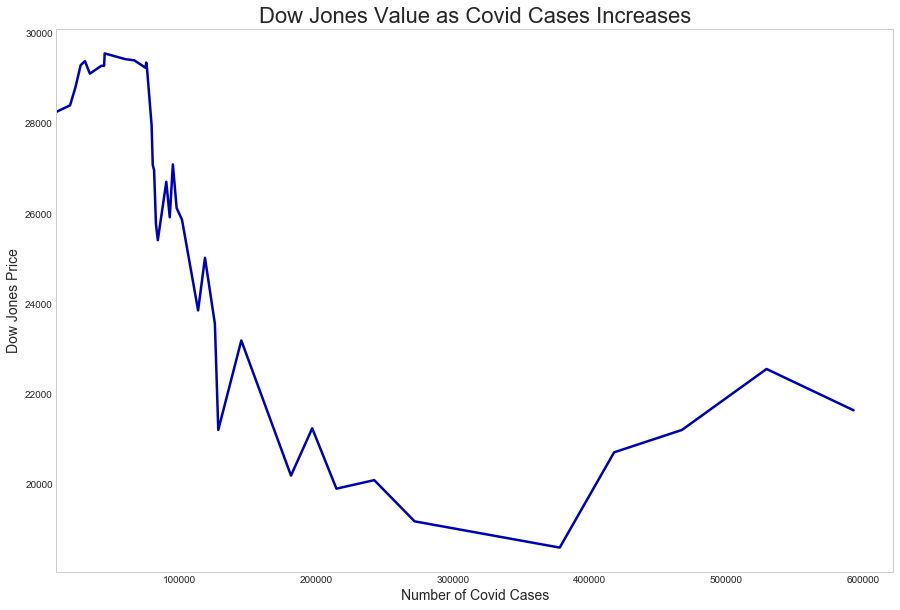

In [259]:
plt.plot('Value','Close',data = df, color = '#0000b3', linewidth = 2.5)
plt.ylabel('Dow Jones Price',fontsize='14')
plt.grid(False)
plt.xlabel('Number of Covid Cases',fontsize='14')
plt.title('Dow Jones Value as Covid Cases Increases',fontsize='22')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.xlim(left=9927)
ax = plt.plot()
plt.show()

In [ ]:
# But what about other indexes like the S&P 500

In [273]:
stock_sp = pd.read_csv('/Users/leonoracrane/Documents/Covid Stock Analysis/^GSPC-2.csv', delimiter = ',')

In [295]:
tau, p_value = stats.kendalltau(CloseSP_array, value_array)
print(p_value)
print(tau)

3.719141650836799e-09
-0.6495512412242325


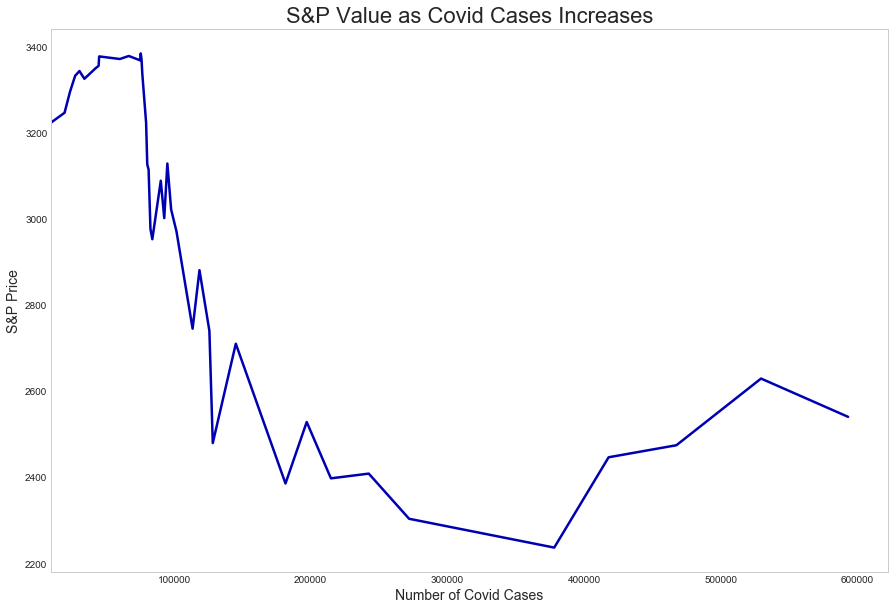

In [296]:
plt.plot('Value','CloseSP', data = df, color = '#0000b3', linewidth = 2.5)
plt.ylabel('S&P Price', fontsize='14')
plt.grid(False)
plt.xlabel('Number of Covid Cases', fontsize='14')
plt.title('S&P Value as Covid Cases Increases', fontsize='22')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.xlim(left = 9927)
ax = plt.plot()
plt.show()